<a href="https://colab.research.google.com/github/SonalikaSingh/AML/blob/Logistic_regression_binary/Logistic_regression_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
df=pd.read_csv('HR_comma_sep.csv')

In [24]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

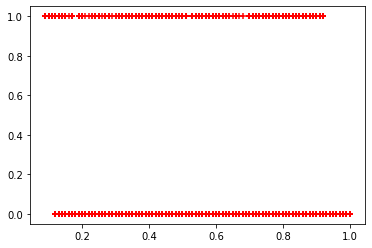

In [4]:

plt.scatter(df.satisfaction_level,df.left,marker='+',color='red')

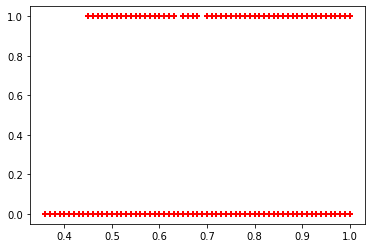

In [6]:
plt.scatter(df.last_evaluation,df.left,marker='+',color='red')

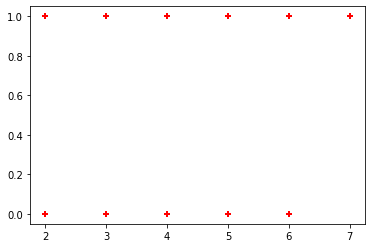

In [7]:
plt.scatter(df.number_project,df.left,marker='+',color='red')

salary and department

In [25]:
s=pd.get_dummies(df.salary)
m1=pd.concat([df,s],axis='columns')
d=pd.get_dummies(df.Department)
m2=pd.concat([df,d],axis='columns')

In [26]:
final=m2.drop(['salary','Department','product_mng','sales'],axis='columns')

In [27]:
X=final.drop(['left'],axis='columns')

In [28]:
final.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,final.left,test_size=0.2)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [31]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
Y_pred=model.predict(X_test)

In [33]:
model.score(X_test,y_test)

0.7653333333333333